## Paso a paso proyecto Merge

Aquí realizaremos el paso a paso del proyecto Merge

### Paso 1: Organización data

Aplicando la métodologia de Cookie cutter establecimos un directorio que va a constar de Cuatro carpetas:

1. Data (Raw/Processed)
2. Notebook
3. Source

### Paso 2: Extracción de la data

Aquí vamos a extraer la data desde la carpeta Data/Raw y crear los objetos dataframe que vamos a estar analizando en python.

In [1]:
import pandas as pd
import os 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = Path(".").resolve().parent
filename1 = "Campañas Febrero.xlsx"
filename2 = "Rendimiento de Ventas Febrero.xlsx"
filename3 = "Ventas Febrero.xlsx"
file_path1 = os.path.join(root_dir, "Data", "Raw", filename1)
file_path2 = os.path.join(root_dir, "Data", "Raw", filename2)
file_path3 = os.path.join(root_dir, "Data", "Raw", filename3)
print(f"{file_path1}\n{file_path2}\n{file_path3}")

C:\Users\calde\OneDrive\Escritorio\Merge\Data\Raw\Campañas Febrero.xlsx
C:\Users\calde\OneDrive\Escritorio\Merge\Data\Raw\Rendimiento de Ventas Febrero.xlsx
C:\Users\calde\OneDrive\Escritorio\Merge\Data\Raw\Ventas Febrero.xlsx


In [3]:
CampañaFeb_1 = pd.read_excel(file_path1,sheet_name="Conjunto de datos1")
CampañaFeb_1.head(2)

,Campaña,Ad Content,Usuarios,Sesiones,Porcentaje de rebote,Páginas/sesión,Duración media de la sesión,Tasa de conversión de comercio electrónico
0,us_pr_ongoing,ongoing-q1-f2_ret_v1,2298,2692,0.802006,1.333210,18.984027,0
1,us_sp_ongoing,presidents-day_pros_v1,272,291,0.810997,1.419244,24.054983,0


In [4]:
CampañaFeb_2 = pd.read_excel(file_path1,sheet_name="Conjunto de datos2")
CampañaFeb_2.head(2)

,Índice de día,Usuarios
0,2021-02-01,2872
1,2021-02-02,3398


In [5]:
Rendimiento_Vtas_Febrero1 = pd.read_excel(file_path2,sheet_name="Conjunto de datos1")
Rendimiento_Vtas_Febrero1.head(2)

,ID de transacción,Fuente/Medio,Ingresos,Impuestos,Envío,Importe del reembolso,Cantidad
0,DSR063BP1TJ9D,google / organic,17901.87,-0.01,0,0,1
1,ZHSP-1568-BE,google / cpc,6972.00,0.00,0,0,2


In [6]:
Rendimiento_Vtas_Febrero2 = pd.read_excel(file_path2,sheet_name="Conjunto de datos2")
Rendimiento_Vtas_Febrero2.head(2)

,Índice de día,Ingresos
0,2021-02-01,6977.0
1,2021-02-02,1197.0


In [7]:
Ventas_febrero =  pd.read_excel(file_path3,sheet_name="Hoja1")
Ventas_febrero.head(2)

,Hotel,Estatus,Fecha de Reserva,Mes,Clave de Confirmación,Nombre del Huésped
0,ZHBP,Interfaced,2021-02-01 01:05:15,February,ZHBP-1028-BE,OSCAR NOVELO
1,ZHBP,Interfaced,2021-02-01 01:05:15,February,ZHBP-1028-BE,OSCAR NOVELO


### Paso 3: Resolución Preguntas
#### Pregunta #1

A cada una de las transacciones del Conjunto de datos1 del archivo “Rendimiento de Ventas Febrero”, asigne el status de venta que se encuentra en el archivo “Ventas Febrero”. (A las transacciones que no se encuentren coincidencias asígnele “NO ENCONTRADO”)

Campos Relacionados:
Rendimiento de Ventas Febrero (ID de transacción) = Ventas Febrero(Clave de Confirmación)

Primero confirmaré que ambos campos tengan el mismo tipo de dato para que no afecté la relación:

In [20]:
if Ventas_febrero['Clave de Confirmación'].dtypes == Rendimiento_Vtas_Febrero1['ID de transacción'].dtypes:
    print("Ambas columnas tienen el mismo tipo de datos.")
else:
    print("Las columnas tienen tipos de datos diferentes.")


Ambas columnas tienen el mismo tipo de datos.


In [10]:
# Seleccionando solo la columna 'Estatus' de Ventas_febrero
Ventas_febrero_subset = Ventas_febrero[['Estatus','Clave de Confirmación']]

# Realizando la fusión basada en los campos relacionados
Rendimiento_Vtas_Febrero1_processed = pd.merge(Rendimiento_Vtas_Febrero1, Ventas_febrero_subset, how='left', left_on='ID de transacción', right_on='Clave de Confirmación')

# Asignando "NO ENCONTRADO" a las filas donde no hay coincidencias
Rendimiento_Vtas_Febrero1_processed['Estatus'] = Rendimiento_Vtas_Febrero1_processed['Estatus'].fillna("NO ENCONTRADO")

# Eliminar valores duplicados en la columna 'ID de transacción'
Rendimiento_Vtas_Febrero1_processed.drop_duplicates(subset=['ID de transacción'], inplace=True)

# Obteniendo la suma de cada estatus para verificación en el excel
suma_por_estatus = Rendimiento_Vtas_Febrero1_processed['Estatus'].value_counts()

print(suma_por_estatus)


Interfaced       34
NO ENCONTRADO     9
Expired           6
Cancel            5
Name: Estatus, dtype: int64


In [39]:
Rendimiento_Vtas_Febrero1_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID de transacción      54 non-null     object 
 1   Fuente/Medio           54 non-null     object 
 2   Ingresos               54 non-null     float64
 3   Impuestos              54 non-null     float64
 4   Envío                  54 non-null     int64  
 5   Importe del reembolso  54 non-null     int64  
 6   Cantidad               54 non-null     int64  
 7   Estatus                54 non-null     object 
 8   Clave de Confirmación  45 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 4.2+ KB


In [27]:
Rendimiento_Vtas_Febrero1_processed.head(3)

,ID de transacción,Fuente/Medio,Ingresos,Impuestos,Envío,Importe del reembolso,Cantidad,Estatus,Clave de Confirmación
0,DSR063BP1TJ9D,google / organic,17901.87,-0.01,0,0,1,NO ENCONTRADO,NaN
1,ZHSP-1568-BE,google / cpc,6972.00,0.00,0,0,2,Interfaced,ZHSP-1568-BE
2,ZHSP-1568-BE,google / cpc,6972.00,0.00,0,0,2,Interfaced,ZHSP-1568-BE


#### Pregunta #2

A partir de la tabla anterior, genere una tabla dinámica con la dimensión de Fuente/Medio y la métrica de ingresos aplicando el filtro de Status donde se tengan únicamente las ventas efectivas (Status=Interfaced), adicionalmente, tomando la métrica de cantidad como el número de habitaciones, agregue una métrica calculada para el precio medio. Haga el gráfico de su preferencia para mostrar el porcentaje de participación de cada medio.

In [11]:
# Filtrar el DataFrame para incluir solo las ventas efectivas
ventas_efectivas = Rendimiento_Vtas_Febrero1_processed[Rendimiento_Vtas_Febrero1_processed['Estatus'] == 'Interfaced']

In [12]:
# Calcular la métrica de precio medio
ventas_efectivas['Precio Medio'] = ventas_efectivas['Ingresos'] / ventas_efectivas['Cantidad']

C:\Users\calde\AppData\Local\Temp\ipykernel_11412\1472062855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_efectivas['Precio Medio'] = ventas_efectivas['Ingresos'] / ventas_efectivas['Cantidad']


In [26]:
# Calcular el precio medio por 'Fuente/Medio'
precio_medio_por_fuente = ventas_efectivas.groupby('Fuente/Medio')['Precio Medio'].mean()

# Crear la tabla dinámica con suma de ingresos por 'Fuente/Medio'
tabla_pivot = pd.pivot_table(ventas_efectivas, values='Ingresos', index='Fuente/Medio', aggfunc='sum')

# Agregar la columna de precio medio a la tabla pivote
tabla_pivot['Precio Medio'] = precio_medio_por_fuente

In [29]:
tabla_pivot.reset_index()

,Fuente/Medio,Ingresos,Precio Medio
0,(direct) / (none),10708.00,2141.6000
1,cj / affiliate,4035.00,2017.5000
2,google / cpc,12537.00,2262.7500
3,google / organic,40639.79,1910.4895
4,mail / email,5520.00,2760.0000
5,search.aol.com / referral,2194.00,2194.0000


Tabla Dinámica:
                           Ingresos  Precio Medio
Fuente/Medio                                     
(direct) / (none)          10708.00     2141.6000
cj / affiliate              4035.00     2017.5000
google / cpc               12537.00     2262.7500
google / organic           40639.79     1910.4895
mail / email                5520.00     2760.0000
search.aol.com / referral   2194.00     2194.0000


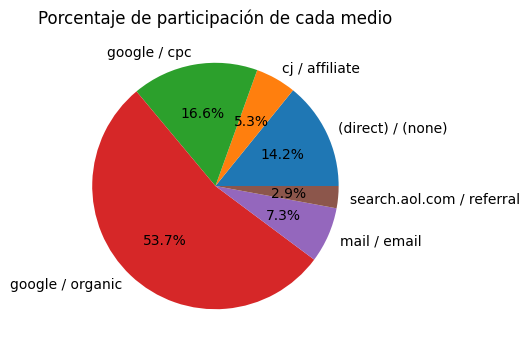

In [27]:
# Graficar el porcentaje de participación de cada medio
grafico = tabla_pivot['Ingresos'].plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4), ylabel='', title='Porcentaje de participación de cada medio')

# Mostrar la tabla dinámica y el gráfico
print("Tabla Dinámica:")
print(tabla_pivot)

#### Pregunta #3

En el archivo “Campañas Febrero”, para el Conjunto de datos1 va a encontrar una tabla con resultados por campaña, la nomenclatura empleada para la marcación de la campaña fue la siguiente (mercado_propiedad_tipodecampaña), con esta información indique cuántas sesiones se tuvieron para cada mercado y tipo de campaña.

In [8]:
CampañaFeb_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Campaña                                     21 non-null     object 
 1   Ad Content                                  21 non-null     object 
 2   Usuarios                                    21 non-null     int64  
 3   Sesiones                                    21 non-null     int64  
 4   Porcentaje de rebote                        21 non-null     float64
 5   Páginas/sesión                              21 non-null     float64
 6   Duración media de la sesión                 21 non-null     float64
 7   Tasa de conversión de comercio electrónico  21 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ KB


In [9]:
# Extraer el mercado y el tipo de campaña de la columna 'Campaña'
CampañaFeb_1['Mercado'] = CampañaFeb_1['Campaña'].str.split('_').str[0]
CampañaFeb_1['Tipo de Campaña'] = CampañaFeb_1['Campaña'].str.split('_').str[2]

# Calcular el número de sesiones para cada mercado y tipo de campaña
sesiones_por_mercado_y_campaña = CampañaFeb_1.groupby(['Mercado', 'Tipo de Campaña'])['Sesiones'].sum().reset_index()

# Mostrar los resultados
print(sesiones_por_mercado_y_campaña)


   Mercado  Tipo de Campaña  Sesiones
0      aus   promo-packages       352
1       br          ongoing       781
2       ca          ongoing       968
3       ca           promos       445
4       cl          ongoing        13
5       co           promos       792
6      ger   promo-packages       131
7       mx         act-fast       457
8       mx          ongoing       439
9       mx           promos      1718
10      uk          ongoing       765
11      uk           promos       317
12      us          ongoing      2983
13      us  ongoing-navidad       651
14      us           promos       911
15      us           q1-feb       878


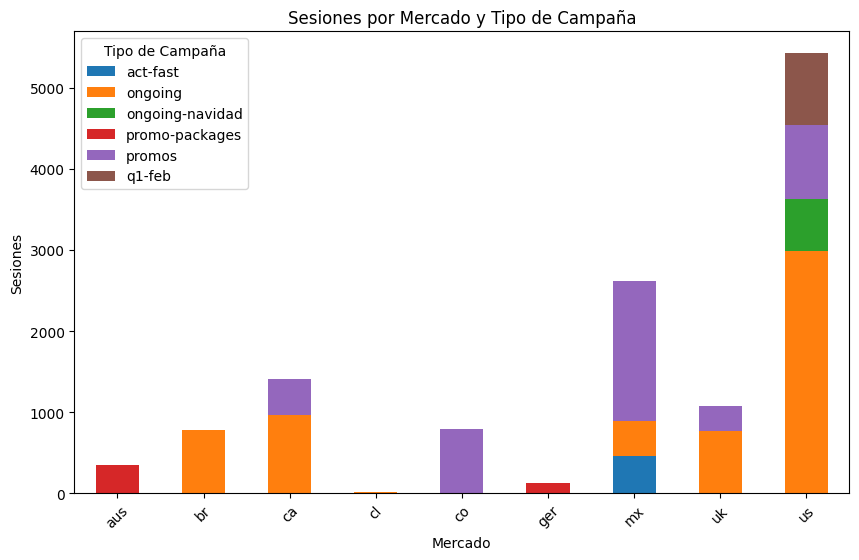

In [51]:
# Reorganizar los datos para crear un DataFrame con los valores de sesiones para cada mercado y tipo de campaña
sesiones_por_mercado_y_campaña_df = sesiones_por_mercado_y_campaña.unstack()

# Crear el gráfico de barras apiladas
sesiones_por_mercado_y_campaña_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Sesiones por Mercado y Tipo de Campaña')
plt.xlabel('Mercado')
plt.ylabel('Sesiones')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Campaña')

# Mostrar el gráfico
plt.show()

#### Pregunta #4

De la tabla anterior también se desea conocer que estrategia funcionó mejor para cada campaña, esta información se puede extraer con la dimensión de Ad Content la cual tiene la siguiente marcación (referencia_estrategia_versión). Cree un gráfico de su preferencia con las dimensiones de campaña y estrategia para conocer para cada campaña que estrategia aportó un mayor número de usuarios.


#### VISTA CON LEYENDA

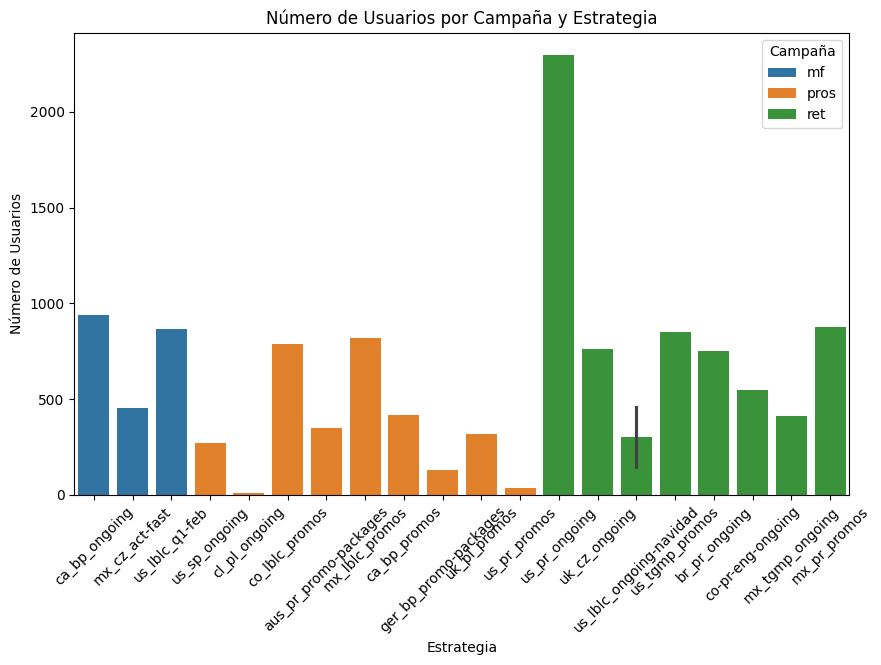

In [75]:
# Extraer la estrategia de la columna 'Ad Content'
CampañaFeb_1['Estrategia'] = CampañaFeb_1['Ad Content'].str.split('_').str[-2]

# Agrupar los datos por campaña y estrategia y sumar el número de usuarios
usuarios_por_campaña_y_estrategia = CampañaFeb_1.groupby(['Estrategia', 'Campaña'])['Usuarios'].sum().unstack()

# Crear un gráfico de barras para cada estrategia
plt.figure(figsize=(10, 6))
for estrategia, data in CampañaFeb_1.groupby('Estrategia'):
    sns.barplot(x='Campaña', y='Usuarios', data=data, label=estrategia)

# Personalizar el gráfico
plt.title('Número de Usuarios por Campaña y Estrategia')
plt.xlabel('Estrategia')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Campaña')

# Mostrar el gráfico
plt.show()

#### VISTA CON ETIQUETAS DE DATOS

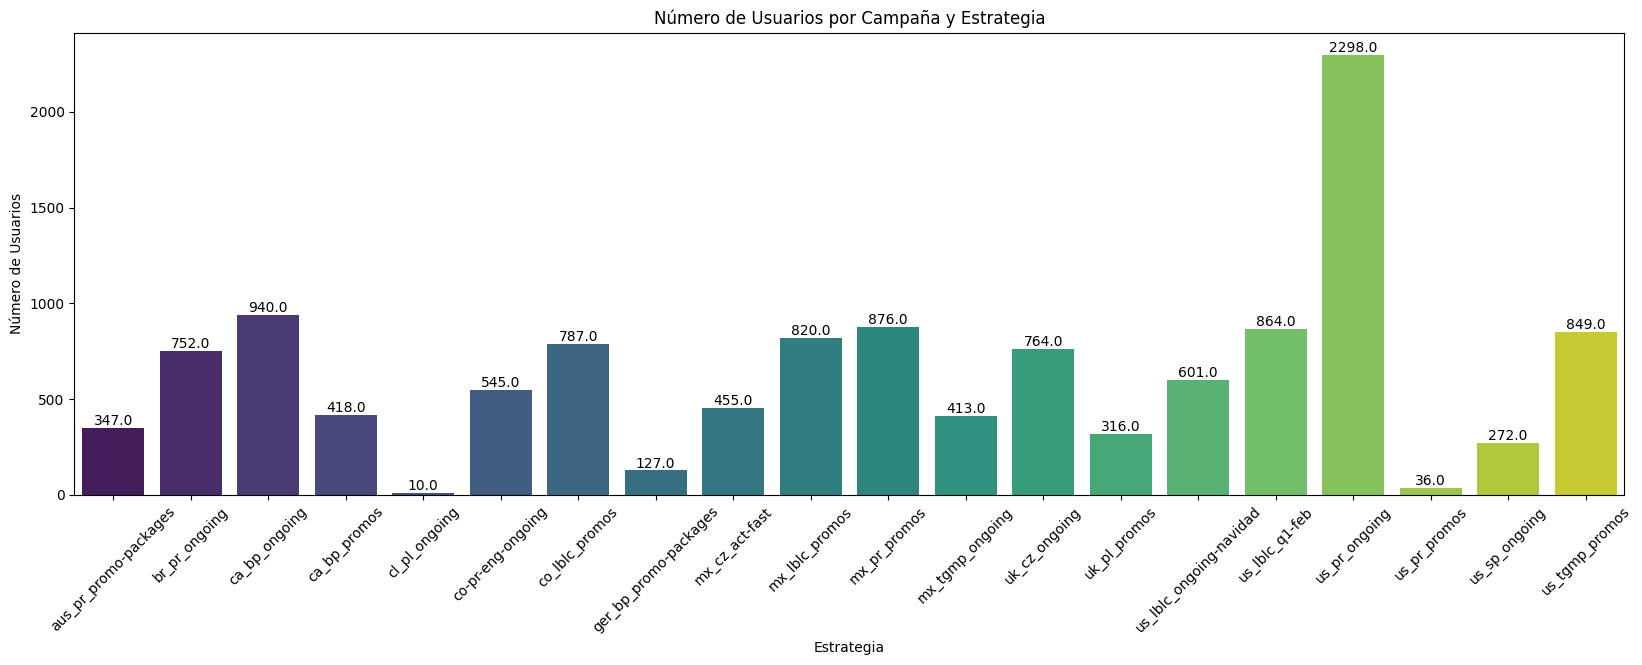

In [85]:
# Extraer la estrategia de la columna 'Ad Content'
CampañaFeb_1['Estrategia'] = CampañaFeb_1['Ad Content'].str.split('_').str[-2]

# Agrupar los datos por campaña y estrategia y sumar el número de usuarios
usuarios_por_campaña_y_estrategia = CampañaFeb_1.groupby(['Estrategia', 'Campaña'])['Usuarios'].sum().unstack()

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(data=usuarios_por_campaña_y_estrategia, palette="viridis")

# Agregar etiquetas con el número de usuarios encima de cada barra
for index, row in usuarios_por_campaña_y_estrategia.iterrows():
    for i, v in enumerate(row):
        if pd.notnull(v):  # Filtrar valores NaN
            plt.text(i, v, str(v), ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Número de Usuarios por Campaña y Estrategia')
plt.xlabel('Estrategia')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [77]:
# Agrupar los datos por campaña y estrategia y encontrar la estrategia que aportó un mayor número de usuarios para cada campaña
estrategia_max_usuarios_por_campaña = CampañaFeb_1.groupby(['Campaña', 'Estrategia'])['Usuarios'].max().reset_index()

# Mostrar formato tabla
print(estrategia_max_usuarios_por_campaña)

                    Campaña Estrategia  Usuarios
0     aus_pr_promo-packages       pros       347
1             br_pr_ongoing        ret       752
2             ca_bp_ongoing         mf       940
3              ca_bp_promos       pros       418
4             cl_pl_ongoing       pros        10
5         co-pr-eng-ongoing        ret       545
6            co_lblc_promos       pros       787
7     ger_bp_promo-packages       pros       127
8            mx_cz_act-fast         mf       455
9            mx_lblc_promos       pros       820
10             mx_pr_promos        ret       876
11          mx_tgmp_ongoing        ret       413
12            uk_cz_ongoing        ret       764
13             uk_pl_promos       pros       316
14  us_lblc_ongoing-navidad        ret       456
15           us_lblc_q1-feb         mf       864
16            us_pr_ongoing        ret      2298
17             us_pr_promos       pros        36
18            us_sp_ongoing       pros       272
19           us_tgmp

#### Pregunta #5

Con el conjunto de datos2 de los archivos “Campañas Febrero” y “Rendimiento de Ventas Febrero”, haga un gráfico por día con las métricas de usuarios e ingresos. ¿Se presenta alguna tendencia?, ¿Existe alguna relación entre ambos resultados? Haga un breve análisis de la gráfica.

In [90]:
# Fusionar los DataFrames en función de la columna de fecha común
merged_df = pd.merge(CampañaFeb_2, Rendimiento_Vtas_Febrero2, on='Índice de día', how='outer')

# Renombrar columnas
merged_df.columns = ['Fecha', 'Usuarios', 'Ingresos']

# Ordenar por fecha
merged_df = merged_df.sort_values(by='Fecha')
merged_df.head(2)

,Fecha,Usuarios,Ingresos
0,2021-02-01,2872,6977.0
1,2021-02-02,3398,1197.0


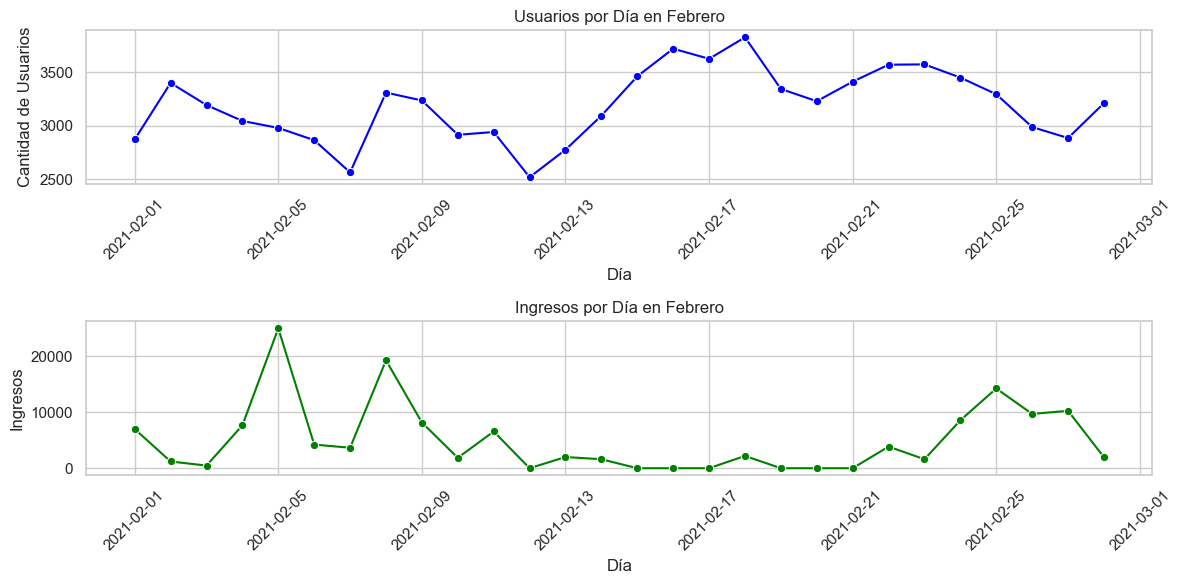

In [93]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear subplots con Seaborn
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # Subplot para Usuarios
sns.lineplot(x='Fecha', y='Usuarios', data=merged_df, marker='o', color='blue')
plt.title('Usuarios por Día en Febrero')
plt.xlabel('Día')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)  # Subplot para Ingresos
sns.lineplot(x='Fecha', y='Ingresos', data=merged_df, marker='o', color='green')
plt.title('Ingresos por Día en Febrero')
plt.xlabel('Día')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)

# Ajustar espaciado
plt.tight_layout()

# Mostrar los gráficos
plt.show()


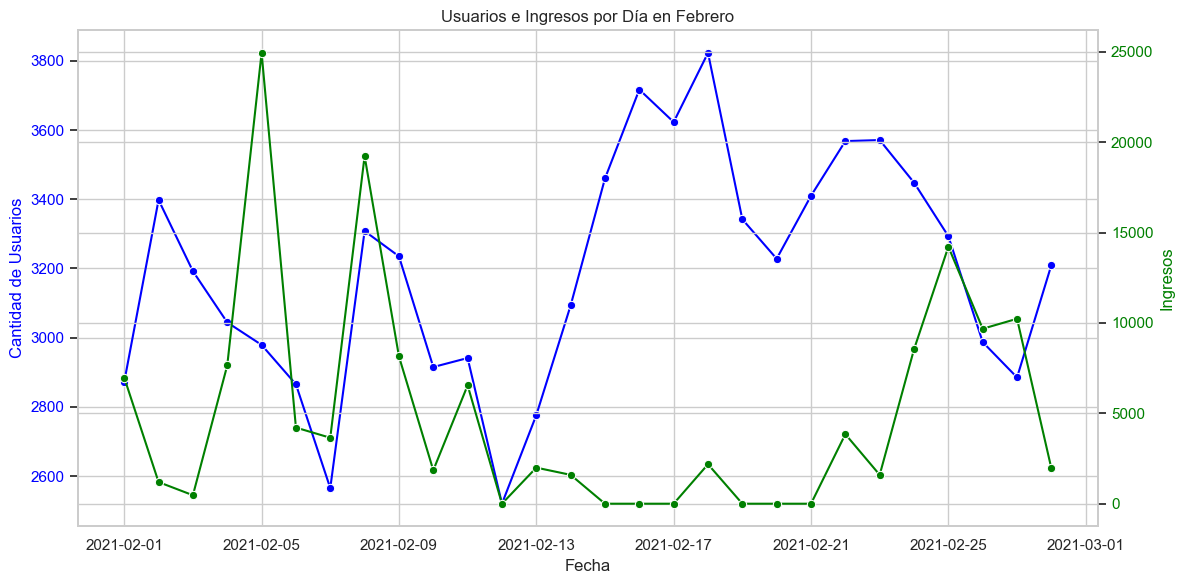

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico con dos ejes y dos escalas
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar la cantidad de usuarios en el primer eje (izquierda)
sns.lineplot(x='Fecha', y='Usuarios', data=merged_df, marker='o', color='blue', ax=ax1)
ax1.set_ylabel('Cantidad de Usuarios', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y escala para los ingresos (derecha)
ax2 = ax1.twinx()
sns.lineplot(x='Fecha', y='Ingresos', data=merged_df, marker='o', color='green', ax=ax2)
ax2.set_ylabel('Ingresos', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Personalizar el gráfico
plt.title('Usuarios e Ingresos por Día en Febrero')
plt.xlabel('Día')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Análisis
Al examinar las tendencias de usuarios e ingresos de forma independiente, se evidencia la existencia de ciertos períodos en los que la variación en la cantidad de usuarios precede a los cambios en los ingresos. Esta observación sugiere una posible relación de causalidad entre el aumento en la cantidad de usuarios y el incremento posterior en los ingresos. Sin embargo, es importante destacar que este fenómeno no ocurre de manera uniforme en todos los casos, ya que la correlación temporal entre usuarios e ingresos no se manifiesta de manera consistente.

Además, se desprende del análisis que la magnitud del aumento en la cantidad de usuarios no siempre se traduce directamente en un incremento proporcional en los ingresos. Es decir, la relación entre usuarios e ingresos no es necesariamente lineal ni estática en el tiempo. Es posible que, a pesar de experimentar una disminución en la cantidad de usuarios, los ingresos generados en un período determinado sean mayores que en un período con una mayor cantidad de usuarios pero con ingresos inferiores.

Estas observaciones subrayan la importancia de considerar no solo la cantidad de usuarios, sino también otros factores relevantes que puedan influir en la generación de ingresos, como la calidad del tráfico, la efectividad de las estrategias de monetización y la estacionalidad del mercado. Asimismo, resaltan la necesidad de adoptar un enfoque analítico integral que permita comprender las complejas interacciones entre usuarios e ingresos en el contexto específico de cada período temporal.

#### Pregunta #6

Finalmente, con base en los resultados anteriores realice un informe detallado que incluya los análisis realizados, hallazgos y recomendaciones para mejorar las estrategias de marketing. Elija su herramienta de preferencia para crear un dashboard que genere visualizaciones de datos claras y concisas que respalden sus análisis y conclusiones

R= Lo que voy a hacer aquí es crear mi script en python y automatizar las estructuras de datos que voy a cargar con mi task manager que correrá dicho script que después será subido a un power BI dondé se realizarán las visualizaciones para finalmente ser subido a Power BI Web service en donde automatizaré este dashboard para que se refresque a una hora especifica.
